In [1]:
import pandas as pd
ad = pd.read_csv('advertising.csv')
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
ad = (ad - ad.mean())/ad.std()
ad.head()

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143


In [3]:
# Putting feature variable to X
X = ad[['TV','Radio','Newspaper']]
# Putting response variable to y
y = ad['Sales']

In [4]:
X['intercept'] = 1
X = X.reindex(['intercept','TV','Radio','Newspaper'], axis=1)

In [20]:
X.head()

,intercept,TV,Radio,Newspaper
0,1,0.967425,0.979066,1.774493
1,1,-1.194379,1.080097,0.667903
2,1,-1.512360,1.524637,1.779084
3,1,0.051919,1.214806,1.283185
4,1,0.393196,-0.839507,1.278593


In [5]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [17]:
# Theta needed to be changed with the number of response varaible used.
theta = np.matrix(np.array([0,0,0,0])) 
alpha = 0.01
iterations = 999

In [11]:
import numpy as np

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [12]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [18]:
gradient_descent_multi(X, y, theta, alpha, iterations)

,Bets,cost
0,"[-5.040412531798211e-18, 0.007783133027372984,...",0.487696
1,"[-1.0036416142611416e-17, 0.015484416820036633...",0.478118
2,"[-1.5054624213917123e-17, 0.023104730166288424...",0.468760
3,"[-1.9761969838327785e-17, 0.03064494219118504,...",0.459617
4,"[-2.4291679778798424e-17, 0.03810591246562723,...",0.450683
...,...,...
994,"[2.6537105846102735e-16, 0.7530271466244216, 0...",0.051138
995,"[2.6543767184250485e-16, 0.7530275184009089, 0...",0.051138
996,"[2.6534885400053485e-16, 0.7530278865846947, 0...",0.051138
997,"[2.6543767184250485e-16, 0.7530282512106896, 0...",0.051138


In [19]:
print(gradient_descent_multi(X, y, theta, alpha, iterations).values[999])

IndexError: index 999 is out of bounds for axis 0 with size 999

<AxesSubplot:xlabel='index'>

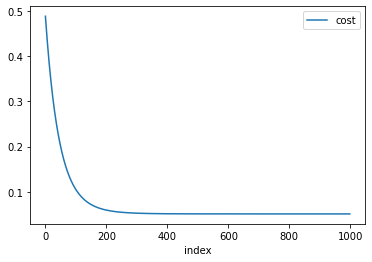

In [20]:
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])

In [21]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

#You don't need to specify an object to save the result because 'lr' will take the results of the fitted model.
lr.fit(X, y)

LinearRegression()

In [22]:
print(lr.intercept_)
print(lr.coef_)

2.6626885691654742e-16
[ 0.          0.75306591  0.53648155 -0.00433069]
